# COVID-19 Studies - Air Quality - Stanley Tran

In [1]:
import numpy as np
import pandas as pd
import datetime
import random
import matplotlib.pyplot as plt

In [2]:
#Air Quality Data: https://aqicn.org/data-platform/covid19/verify/525842af-a96a-48c1-a014-103e81e29812

In [56]:
Air_Quality_Data = pd.read_csv("D:/Covid 19 Data/Data/waqi-covid19-airqualitydata-20200711.csv", sep=",", parse_dates = ['Date'])

In [57]:
Air_Quality_Data.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-05-13,GH,Accra,dew,15,24.0,26.0,25.0,6.38
1,2020-05-20,GH,Accra,dew,18,23.0,26.0,25.0,7.32
2,2020-06-03,GH,Accra,dew,17,22.0,25.0,23.0,11.91
3,2020-05-12,GH,Accra,dew,15,23.0,26.0,24.0,8.38
4,2020-05-22,GH,Accra,dew,9,23.0,26.0,24.0,10.00


In [58]:
Air_Quality_Data_USA = Air_Quality_Data.loc[Air_Quality_Data['Country'] == 'US']

In [59]:
Air_Quality_Data_USA.head()

,Date,Country,City,Specie,count,min,max,median,variance
430235,2020-05-06,US,Oklahoma City,wind-gust,42,0.2,11.0,3.5,74.10
430236,2020-04-06,US,Oklahoma City,wind-gust,52,9.5,17.0,12.6,29.42
430237,2020-04-09,US,Oklahoma City,wind-gust,50,0.8,13.5,5.2,133.14
430238,2020-04-14,US,Oklahoma City,wind-gust,48,0.6,5.8,2.7,24.64
430239,2020-05-03,US,Oklahoma City,wind-gust,49,0.2,10.3,5.0,77.09


In [60]:
Air_Quality_Data_USA_1 = Air_Quality_Data_USA.groupby(['Date', 'Specie'])['count', 'min', 'max', 'median', 'variance'].mean()

In [61]:
Air_Quality_Data_USA_1.head()

count        min        max     median     variance
Date       Specie                                                           
2019-12-30 co        40.500000   1.550000   8.329412   2.650000    97.061176
           humidity  24.000000  60.500000  93.700000  72.500000  1101.460000
           no2       50.771429   2.928571  20.731429   9.005714   276.240857
           o3        49.843137   7.237255  25.286275  16.609804   346.480000
           pm10      64.909091   3.772727  32.045455  11.181818   556.732273

In [62]:
Air_Quality_Data_USA_1 = Air_Quality_Data_USA_1.reset_index()

In [63]:
Air_Quality_Data_USA_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 7 columns):
Date        2564 non-null datetime64[ns]
Specie      2564 non-null object
count       2564 non-null float64
min         2564 non-null float64
max         2564 non-null float64
median      2564 non-null float64
variance    2564 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 140.3+ KB


In [64]:
#from pyspark.sql import SparkSession

In [65]:
#spark = SparkSession \
#    .builder \
#    .appName("Python Spark SQL basic example") \
#    .config("spark.some.config.option", "some-value") \
#    .getOrCreate()

In [66]:
#sc = spark.sparkContext

In [67]:
#Air_Quality_Data_Brazil_Spark = spark.createDataFrame(Air_Quality_Data_Brazil)

In [68]:
#from pyspark.sql import functions as F

In [69]:
#Air_Quality_Data_Brazil_Spark_1 = Air_Quality_Data_Brazil_Spark.groupBy("Date", "Specie")\
#                                                            .agg(F.mean('median'), F.mean('variance'))

In [70]:
#Air_Quality_Data_Brazil_Spark_2 = Air_Quality_Data_Brazil_Spark_1.withColumnRenamed("avg(median)", "median")\
#                                                               .withColumnRenamed("avg(variance)", "variance")

### OWID COVID-19 Data - More Complete Dataset

In [73]:
owid_covid_data = pd.read_csv("D:/Covid 19 Data/Data/owid-covid-data - 07112020.csv", sep=",", parse_dates = ['date'])

In [74]:
owid_covid_data = owid_covid_data.replace(np.nan,0)

In [75]:
owid_covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591 entries, 0 to 29590
Data columns (total 34 columns):
iso_code                           29591 non-null object
continent                          29591 non-null object
location                           29591 non-null object
date                               29591 non-null datetime64[ns]
total_cases                        29591 non-null float64
new_cases                          29591 non-null float64
total_deaths                       29591 non-null float64
new_deaths                         29591 non-null float64
total_cases_per_million            29591 non-null float64
new_cases_per_million              29591 non-null float64
total_deaths_per_million           29591 non-null float64
new_deaths_per_million             29591 non-null float64
total_tests                        29591 non-null float64
new_tests                          29591 non-null float64
total_tests_per_thousand           29591 non-null float64
new_tests_per_tho

In [76]:
owid_covid_data_USA = owid_covid_data.loc[owid_covid_data['iso_code'] == 'USA']

In [77]:
COVID_Testing_Data = pd.merge(owid_covid_data_USA, Air_Quality_Data_USA_1, how='left', left_on=['date'], right_on=['Date'])

In [78]:
COVID_Testing_Data = COVID_Testing_Data.dropna()

In [79]:
COVID_Testing_Data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,Date,Specie,count,min,max,median,variance
0,USA,North America,United States,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.77,78.86,2019-12-31,co,41.257143,1.505714,8.171429,3.271429,47.285143
1,USA,North America,United States,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.77,78.86,2019-12-31,humidity,24.000000,44.500000,93.500000,72.700000,2042.550000
2,USA,North America,United States,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.77,78.86,2019-12-31,no2,52.085714,3.137143,22.637143,10.122857,311.742571
3,USA,North America,United States,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.77,78.86,2019-12-31,o3,50.720000,5.322000,26.802000,15.978000,502.929400
4,USA,North America,United States,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.77,78.86,2019-12-31,pm10,64.304348,4.478261,49.130435,11.478261,1370.400000


#### New cases vs CO emission

In [80]:
COVID_Testing_Data_CO = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'co']

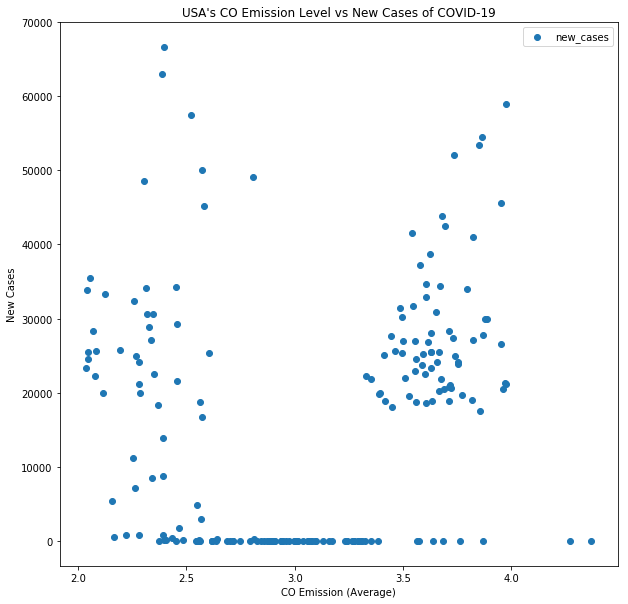

In [81]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_CO['median'],
        COVID_Testing_Data_CO['new_cases'])

# Set title and labels for axes
ax.set(xlabel="CO Emission (Average)",
       ylabel= 'New Cases',
       title="USA's CO Emission Level vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

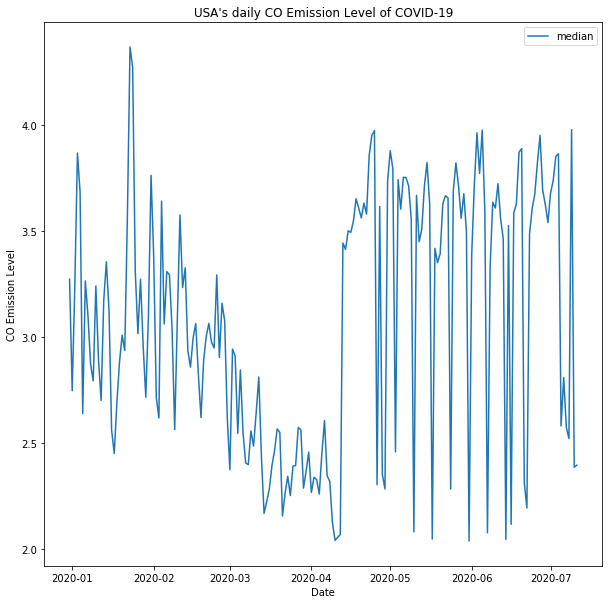

In [88]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(COVID_Testing_Data_CO['date'],
        COVID_Testing_Data_CO['median'])

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel= 'CO Emission Level',
       title="USA's daily CO Emission Level of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs NO2 emission

In [27]:
COVID_Testing_Data_NO2 = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'no2']

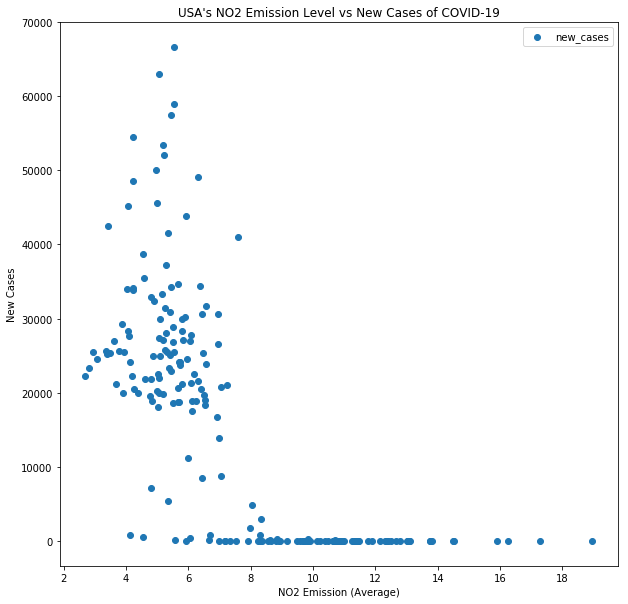

In [28]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_NO2['median'],
        COVID_Testing_Data_NO2['new_cases'])

# Set title and labels for axes
ax.set(xlabel="NO2 Emission (Average)",
       ylabel= 'New Cases',
       title="USA's NO2 Emission Level vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs O3 emission

In [29]:
COVID_Testing_Data_O3 = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'o3']

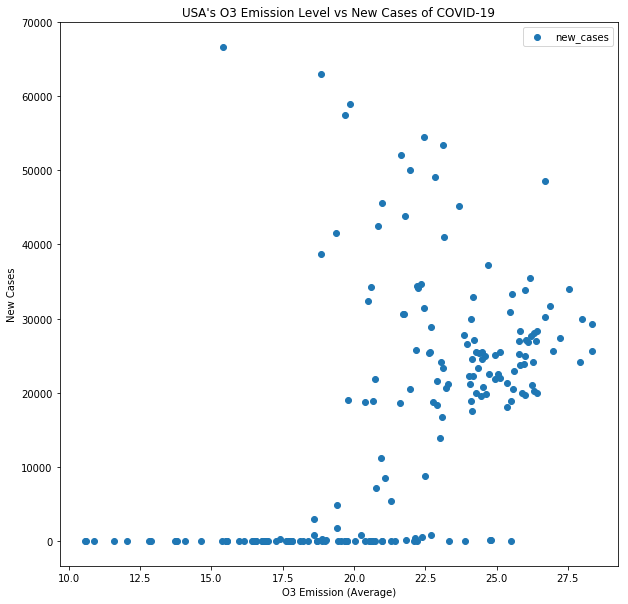

In [89]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_O3['median'],
        COVID_Testing_Data_O3['new_cases'])

# Set title and labels for axes
ax.set(xlabel="O3 Emission (Average)",
       ylabel= 'New Cases',
       title="USA's O3 Emission Level vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs SO2 emission

In [31]:
COVID_Testing_Data_SO2 = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'so2']

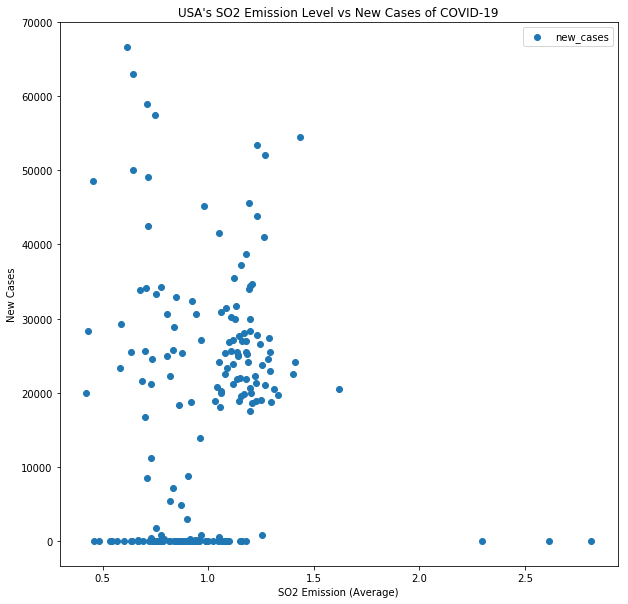

In [32]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_SO2['median'],
        COVID_Testing_Data_SO2['new_cases'])

# Set title and labels for axes
ax.set(xlabel="SO2 Emission (Average)",
       ylabel= 'New Cases',
       title="USA's SO2 Emission Level vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Temperature

In [33]:
COVID_Testing_Data_Temp = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'temperature']

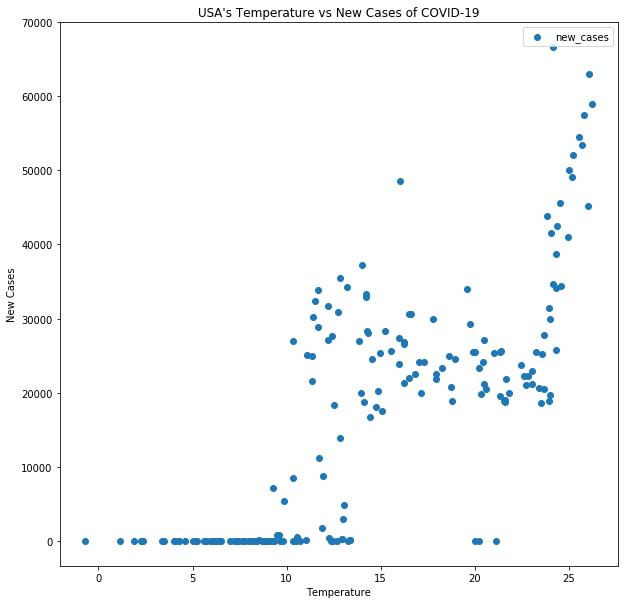

In [34]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Temp['median'],
        COVID_Testing_Data_Temp['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Temperature",
       ylabel= 'New Cases',
       title="USA's Temperature vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Humidity

In [35]:
COVID_Testing_Data_Hum = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'humidity']

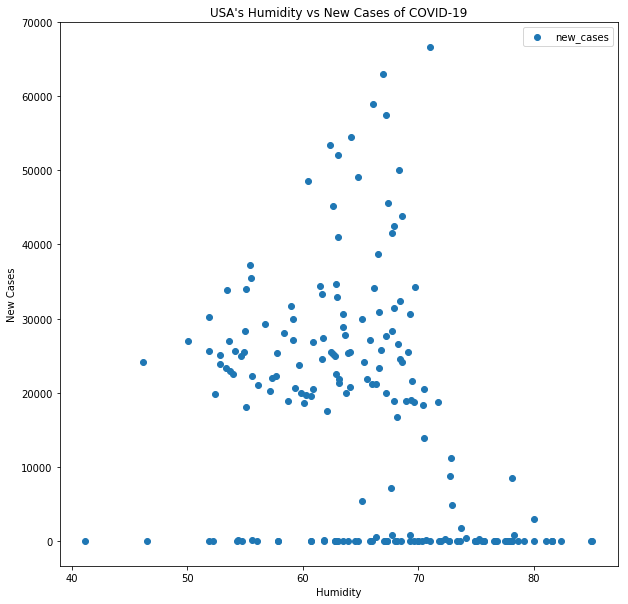

In [36]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Hum['median'],
        COVID_Testing_Data_Hum['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Humidity",
       ylabel= 'New Cases',
       title="USA's Humidity vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Dew Point

In [37]:
COVID_Testing_Data_Dew = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'dew']

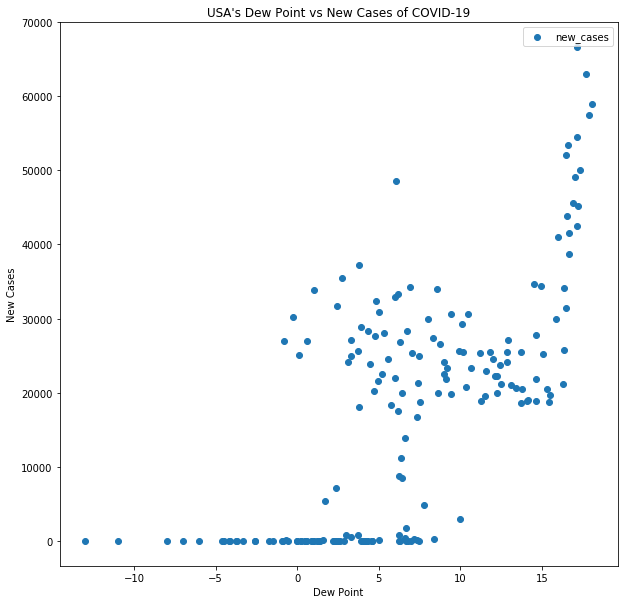

In [38]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Dew['median'],
        COVID_Testing_Data_Dew['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Dew Point",
       ylabel= 'New Cases',
       title="USA's Dew Point vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs PM10 particles

In [39]:
COVID_Testing_Data_PM10 = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'pm10']

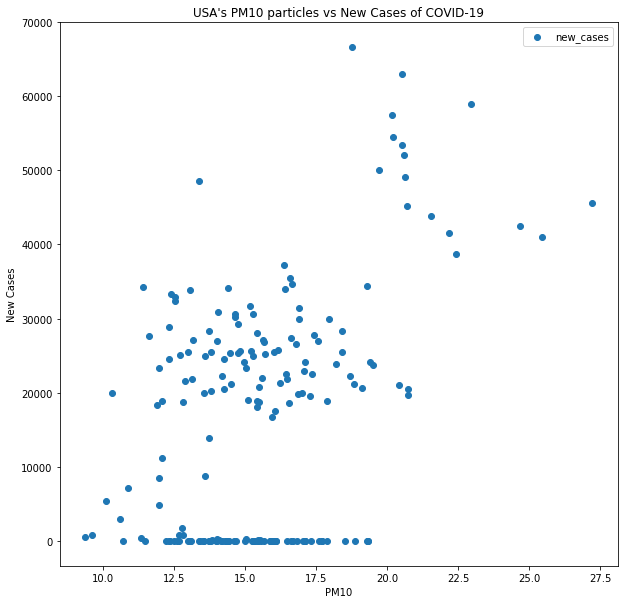

In [40]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_PM10['median'],
        COVID_Testing_Data_PM10['new_cases'])

# Set title and labels for axes
ax.set(xlabel="PM10",
       ylabel= 'New Cases',
       title="USA's PM10 particles vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs PM2.5 particles

In [41]:
COVID_Testing_Data_PM25 = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'pm25']

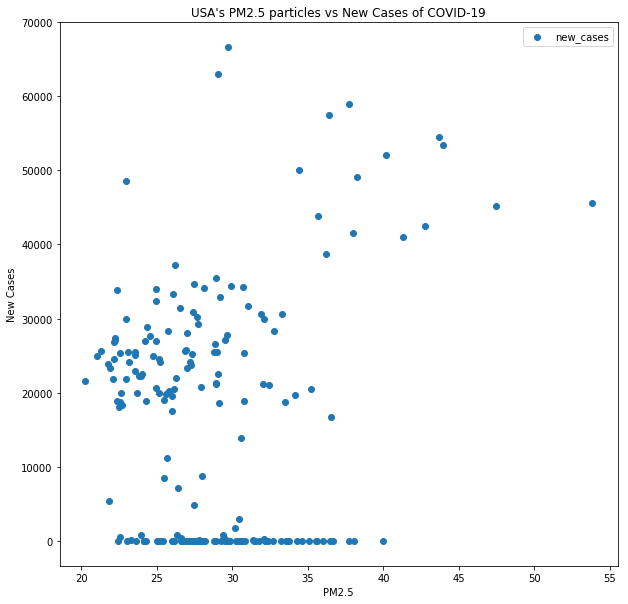

In [90]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_PM25['median'],
        COVID_Testing_Data_PM25['new_cases'])

# Set title and labels for axes
ax.set(xlabel="PM2.5",
       ylabel= 'New Cases',
       title="USA's PM2.5 particles vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Atmospheric Pressure

In [43]:
COVID_Testing_Data_Pressure = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'] == 'pressure']

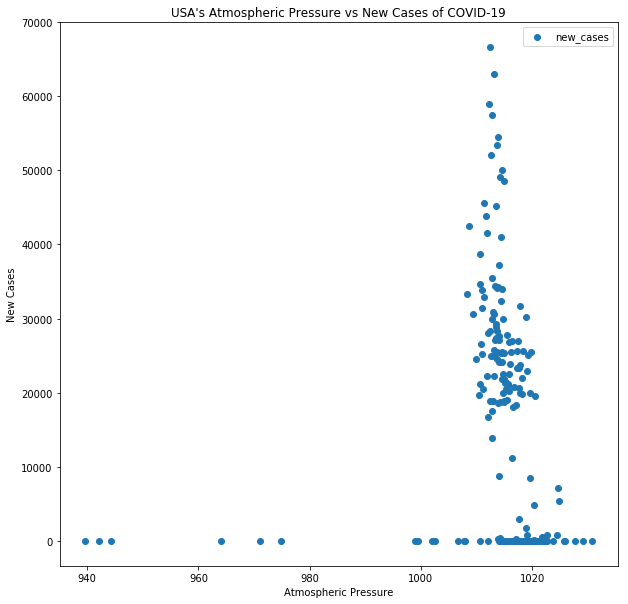

In [44]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Pressure['median'],
        COVID_Testing_Data_Pressure['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Atmospheric Pressure",
       ylabel= 'New Cases',
       title="USA's Atmospheric Pressure vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Wind Gust

In [45]:
COVID_Testing_Data_Wind_Gust = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'].isin(['wind-gust', 'wind gust'])]

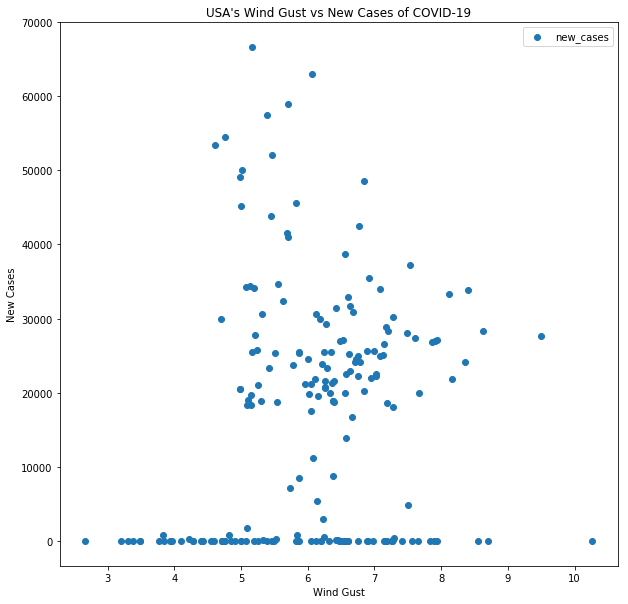

In [46]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Wind_Gust['median'],
        COVID_Testing_Data_Wind_Gust['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Wind Gust",
       ylabel= 'New Cases',
       title="USA's Wind Gust vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

#### New cases vs Wind Speed

In [47]:
COVID_Testing_Data_Wind_Speed = COVID_Testing_Data.loc[COVID_Testing_Data['Specie'].isin(['wind-speed', 'wind speed'])]

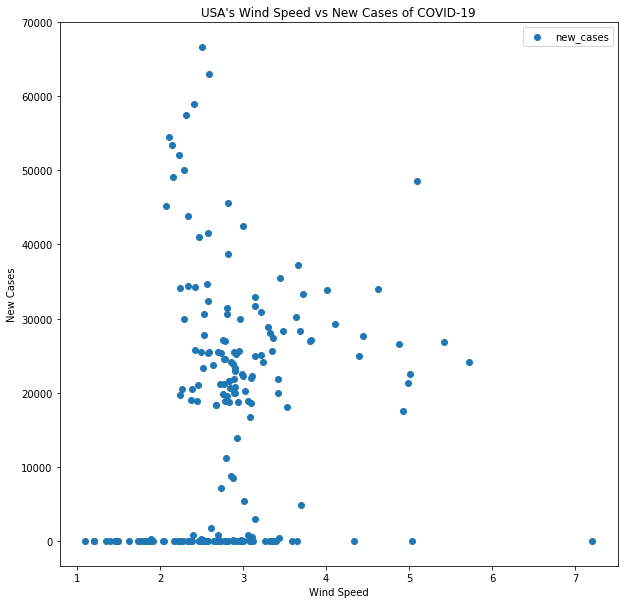

In [48]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(COVID_Testing_Data_Wind_Speed['median'],
        COVID_Testing_Data_Wind_Speed['new_cases'])

# Set title and labels for axes
ax.set(xlabel="Wind Speed",
       ylabel= 'New Cases',
       title="USA's Wind Speed vs New Cases of COVID-19")

ax.legend(loc='best')

plt.show()

In [49]:
Air_Quality_Data_USA_1.head()

,Date,Specie,count,min,max,median,variance
0,2019-12-30,co,40.500000,1.550000,8.329412,2.650000,97.061176
1,2019-12-30,humidity,24.000000,60.500000,93.700000,72.500000,1101.460000
2,2019-12-30,no2,50.771429,2.928571,20.731429,9.005714,276.240857
3,2019-12-30,o3,49.843137,7.237255,25.286275,16.609804,346.480000
4,2019-12-30,pm10,64.909091,3.772727,32.045455,11.181818,556.732273
